In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('inViales_2022_2024.csv')
df

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud
0,C2C/20211229/00212,2021-12-29,23:21:20,Miércoles,2022-01-01,00:24:06,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,Cuauhtémoc,Roma Norte,-99.163670,19.421610
1,C2C/20211231/00183,2021-12-31,23:48:03,Viernes,2022-01-01,06:29:52,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.144270,19.409910
2,C2C/20220101/00012,2022-01-01,01:06:39,Sábado,2022-01-01,06:00:12,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Doctores,-99.148320,19.415250
3,C2C/20220101/00070,2022-01-01,09:51:53,Sábado,2022-01-01,12:54:10,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649
4,C2N/20211231/00128,2021-12-31,23:03:05,Viernes,2022-01-01,06:16:42,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,Iztacalco,Agricola Pantitlan,-99.060450,19.414620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,19:53:36,Jueves,2024-02-29,23:16:21,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,El Vergel,-99.087270,19.320600
504257,C5/20240229/04038,2024-02-29,20:01:42,Jueves,2024-02-29,23:06:17,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.125200,19.428723
504258,C5/20240229/04286,2024-02-29,20:43:20,Jueves,2024-02-29,23:46:22,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.119881,19.380011
504259,C5/20240229/04300,2024-02-29,20:46:18,Jueves,2024-02-29,23:56:17,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Guadalupe Del Moral,-99.080981,19.369412


In [3]:
df.fecha_creacion.min()

'2021-12-29'

In [4]:
df.fecha_creacion.max()

'2024-02-29'

In [5]:
#print(df.columns)
filtered_df = df[df['tipo_incidente_c4'].isin(['Lesionado', 'Accidente', 'Cadáver'])]
df.head()

# COUNT HOW MANY OF EACH INCIDENT THERE ARE
df['tipo_incidente_c4'].value_counts()
df.tipo_incidente_c4.value_counts()

## On which date are there the most incidents?
df.fecha_creacion.value_counts().idxmax()

# Get the whole row
df[df['fecha_creacion'] == df['fecha_creacion'].value_counts().idxmax()]

## OK so let's understand this better: let's break this down
df['fecha_creacion'] == df['fecha_creacion'].value_counts().idxmax()

df['fecha_creacion'].value_counts().idxmax() # Tells you which VALUE in that column has the maximum

### Voy a agarrar todas las filas de lesionados y accidentes

## CONDITION:
df["tipo_incidente_c4"].isin(["Accidente", "Lesionado"])

#FILTER
filtro_prueba = df[df["tipo_incidente_c4"].isin(["Accidente", "Lesionado"])]
filtro_prueba.tipo_incidente_c4.unique()


array(['Lesionado', 'Accidente'], dtype=object)

# EDA por colonia

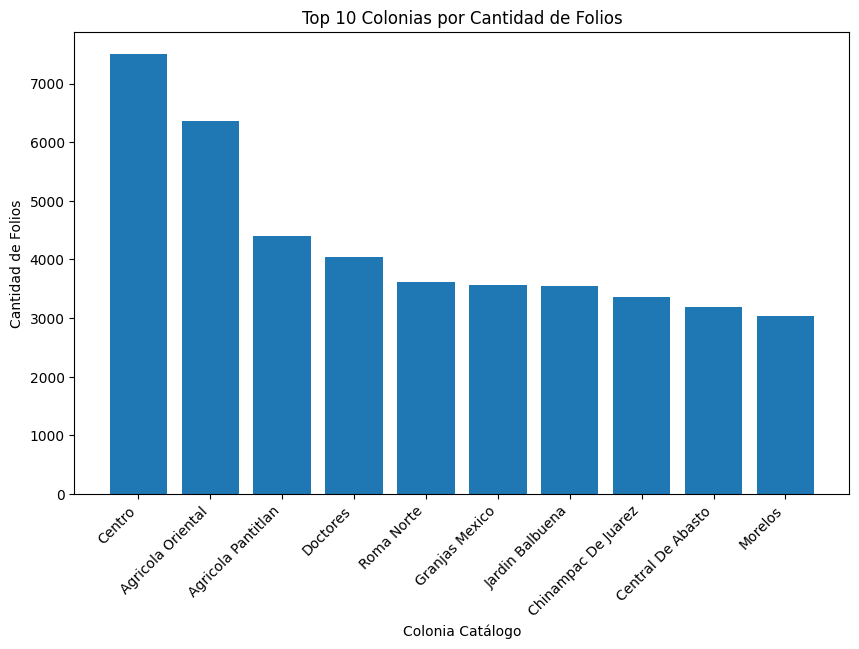

In [6]:
# Suponiendo que df es tu DataFrame
result = df.groupby('colonia_catalogo').folio.count().sort_values(ascending=False).head(10)
result_df = pd.DataFrame(result).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(result_df['colonia_catalogo'], result_df['folio'])
plt.xlabel('Colonia Catálogo')
plt.ylabel('Cantidad de Folios')
plt.title('Top 10 Colonias por Cantidad de Folios')
plt.xticks(rotation=45, ha='right')
plt.show()

# EDA por fecha y año

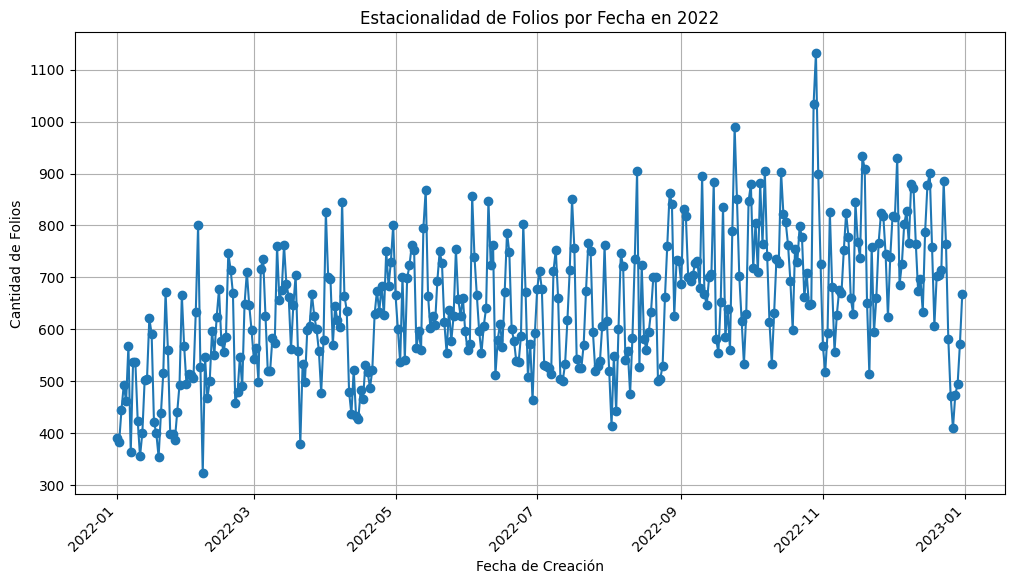

In [7]:
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])

result = df.groupby('fecha_creacion').folio.count().sort_index()
filtered_result = result.loc['2022-01-01':'2022-12-31']

result_df = pd.DataFrame(filtered_result).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(result_df['fecha_creacion'], result_df['folio'], marker='o', linestyle='-')
plt.xlabel('Fecha de Creación')
plt.ylabel('Cantidad de Folios')
plt.title('Estacionalidad de Folios por Fecha en 2022')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

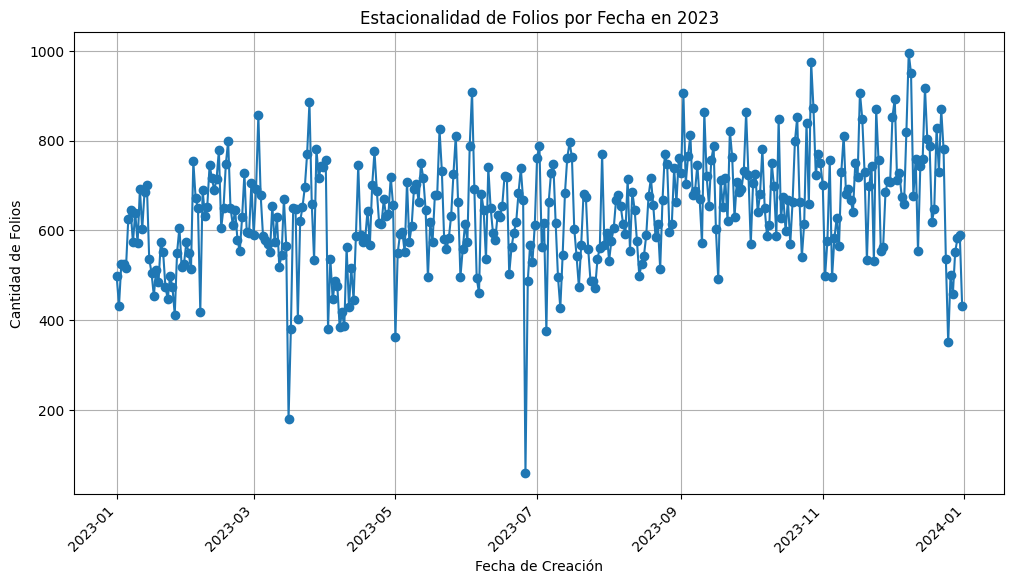

In [8]:
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])

result = df.groupby('fecha_creacion').folio.count().sort_index()
filtered_result = result.loc['2023-01-01':'2023-12-31']

result_df = pd.DataFrame(filtered_result).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(result_df['fecha_creacion'], result_df['folio'], marker='o', linestyle='-')
plt.xlabel('Fecha de Creación')
plt.ylabel('Cantidad de Folios')
plt.title('Estacionalidad de Folios por Fecha en 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# EDA por hora

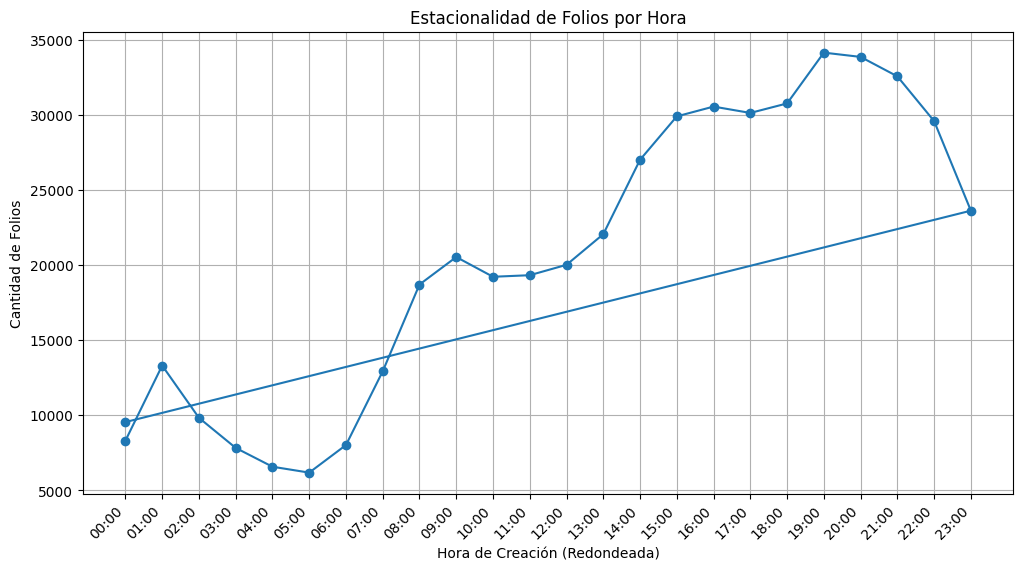

In [9]:
df['hora_creacion'] = pd.to_datetime(df['hora_creacion'], format='%H:%M:%S')

df['hora_redondeada'] = df['hora_creacion'].dt.round('H')

result = df.groupby('hora_redondeada').folio.count()

result_df = pd.DataFrame(result).reset_index()

result_df['hora_redondeada'] = result_df['hora_redondeada'].dt.strftime('%H:%M')

plt.figure(figsize=(12, 6))
plt.plot(result_df['hora_redondeada'], result_df['folio'], marker='o', linestyle='-')
plt.xlabel('Hora de Creación (Redondeada)')
plt.ylabel('Cantidad de Folios')
plt.title('Estacionalidad de Folios por Hora')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [10]:
df['hora_usable'] = df['hora_redondeada'].dt.strftime('%H:%M')

In [11]:
hora_total = pd.DataFrame(df.groupby('hora_usable').folio.count())
hora_lunes = pd.DataFrame(df.query('dia_semana == "Lunes"').groupby('hora_usable').folio.count())
hora_martes = pd.DataFrame(df.query('dia_semana == "Martes"').groupby('hora_usable').folio.count())
hora_miercoles = pd.DataFrame(df.query('dia_semana == "Miércoles"').groupby('hora_usable').folio.count())
hora_jueves = pd.DataFrame(df.query('dia_semana == "Jueves"').groupby('hora_usable').folio.count())
hora_viernes = pd.DataFrame(df.query('dia_semana == "Viernes"').groupby('hora_usable').folio.count())
hora_sabado = pd.DataFrame(df.query('dia_semana == "Sábado"').groupby('hora_usable').folio.count())
hora_domingo = pd.DataFrame(df.query('dia_semana == "Domingo"').groupby('hora_usable').folio.count())

In [12]:
# hora_total.to_csv('hora_total.csv')
# hora_lunes.to_csv('hora_lunes.csv')
# hora_martes.to_csv('hora_martes.csv')
# hora_miercoles.to_csv('hora_miercoles.csv')
# hora_jueves.to_csv('hora_jueves.csv')
# hora_viernes.to_csv('hora_viernes.csv')
# hora_sabado.to_csv('hora_sabado.csv')
# hora_domingo.to_csv('hora_domingo.csv')

# Intentaré hacer filtros en JS por colonia

In [100]:
df

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,hora_redondeada,hora_usable
0,C2C/20211229/00212,2021-12-29,1900-01-01 23:21:20,Miércoles,2022-01-01,00:24:06,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,Cuauhtémoc,Roma Norte,-99.163670,19.421610,1900-01-01 23:00:00,23:00
1,C2C/20211231/00183,2021-12-31,1900-01-01 23:48:03,Viernes,2022-01-01,06:29:52,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.144270,19.409910,1900-01-02 00:00:00,00:00
2,C2C/20220101/00012,2022-01-01,1900-01-01 01:06:39,Sábado,2022-01-01,06:00:12,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Doctores,-99.148320,19.415250,1900-01-01 01:00:00,01:00
3,C2C/20220101/00070,2022-01-01,1900-01-01 09:51:53,Sábado,2022-01-01,12:54:10,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649,1900-01-01 10:00:00,10:00
4,C2N/20211231/00128,2021-12-31,1900-01-01 23:03:05,Viernes,2022-01-01,06:16:42,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,Iztacalco,Agricola Pantitlan,-99.060450,19.414620,1900-01-01 23:00:00,23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,1900-01-01 19:53:36,Jueves,2024-02-29,23:16:21,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,El Vergel,-99.087270,19.320600,1900-01-01 20:00:00,20:00
504257,C5/20240229/04038,2024-02-29,1900-01-01 20:01:42,Jueves,2024-02-29,23:06:17,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.125200,19.428723,1900-01-01 20:00:00,20:00
504258,C5/20240229/04286,2024-02-29,1900-01-01 20:43:20,Jueves,2024-02-29,23:46:22,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.119881,19.380011,1900-01-01 21:00:00,21:00
504259,C5/20240229/04300,2024-02-29,1900-01-01 20:46:18,Jueves,2024-02-29,23:56:17,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Guadalupe Del Moral,-99.080981,19.369412,1900-01-01 21:00:00,21:00


In [101]:
df_colonia = df.pivot_table(index=['alcaldia_catalogo','dia_semana'], columns='hora_usable', values='folio', aggfunc='count')

In [103]:
df_colonia.reset_index(inplace=True)

In [105]:
df_colonia.columns.name = None

In [108]:
df_colonia.set_index(['alcaldia_catalogo','dia_semana'], inplace=True)

In [111]:
#df_colonia.loc['Total'] = list(df.groupby('hora_usable').folio.count().values)

In [113]:
#df_colonia.to_csv('por_alcaldia.csv')

# EDA POR DÍA DE LA SEMANA

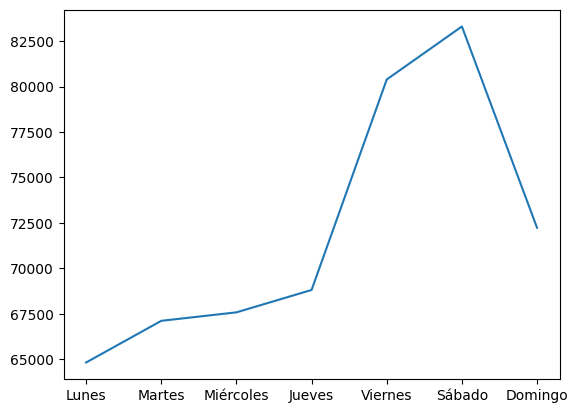

In [14]:
df.head()

## TWO METHODS FOR THE SAME THING
df.dia_semana.value_counts()
df.groupby("dia_semana").count()["folio"]

#plt.plot(df.dia_semana.value_counts())
#plt.plot(df.groupby("dia_semana").count()["folio"])

# Define the desired order of days, MAKE A LIST
desired_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Reindex the value counts Series according to the desired order
ordered_value_counts = df['dia_semana'].value_counts().reindex(desired_order)

plt.plot(ordered_value_counts)


In [15]:
# Let's do it again without looking

df.dia_semana.value_counts().reindex(desired_order)

dia_semana
Lunes        64825
Martes       67116
Miércoles    67582
Jueves       68813
Viernes      80389
Sábado       83303
Domingo      72233
Name: count, dtype: int64

## PROPUESTA PROYECTO

In [16]:
df1 = pd.read_csv('infracciones_infracciones_transito_2023_b2.csv')
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'infracciones_infracciones_transito_2023_b2.csv'

In [ ]:
df1['longitud'].isna().count()
df1.shape

In [ ]:
df1.alcaldia.unique()

In [ ]:
df.alcaldia_catalogo.unique()

In [ ]:
# Assuming df and df1 are your DataFrames
unique_values_df = set(df.alcaldia_catalogo.unique())
unique_values_df1 = set(df1.alcaldia.unique())

# Values in df.alcaldia_catalogo.unique() but not in df1.alcaldia.unique()
not_in_df1 = unique_values_df - unique_values_df1

# Values in df1.alcaldia.unique() but not in df.alcaldia_catalogo.unique()
not_in_df = unique_values_df1 - unique_values_df

print("Values in df.alcaldia_catalogo.unique() but not in df1.alcaldia.unique():")
print(not_in_df1)
print("\nValues in df1.alcaldia.unique() but not in df.alcaldia_catalogo.unique():")
print(not_in_df)


In [ ]:
# Remove 'nan' from df.alcaldia_catalogo and 'Desconocido' from df1.alcaldia
deleted_from_df = df[df['alcaldia_catalogo'].notna()]['alcaldia_catalogo'].unique()
deleted_from_df1 = df1[df1['alcaldia'] != 'Desconocido']['alcaldia'].unique()

# Count how many were deleted
num_deleted_from_df = len(deleted_from_df)
num_deleted_from_df1 = len(deleted_from_df1)

# Update the DataFrames by removing the values
df = df[df['alcaldia_catalogo'].notna()]
df1 = df1[df1['alcaldia'] != 'Desconocido']

print("Number of values deleted from df.alcaldia_catalogo:", num_deleted_from_df)
print("Number of values deleted from df1.alcaldia:", num_deleted_from_df1)


In [ ]:
print(df1.categoria.unique()[3])
print(df1.categoria.unique()[-1])

In [ ]:
# Count the number of values in each category for 'alcaldia_catalogo' in df and print
print("Count of values in each category for 'alcaldia_catalogo' in df:")
print(df['alcaldia_catalogo'].value_counts())
print("\n")

# Count how many times each 'alcaldia_catalogo' has either "Exceder límites de velocidad" or "Conducir bajo los efectos del alcohol" in the 'categoria' column of df1
print("Count of occurrences of 'Exceder límites de velocidad' and 'Conducir bajo los efectos del alcohol' for each 'alcaldia_catalogo' in df1:")
filtered_df1 = df1[df1['categoria'].isin(["Exceder límites de velocidad", "Conducir bajo los efectos del alcohol"])]
print(filtered_df1['alcaldia'].value_counts())


In [ ]:
df.tipo_incidente_c4.unique()